# Eppy Tutorial

Authors: Santosh Philip, Leora Tanjuatco

Eppy is a scripting language for E+ idf files, and E+ output files. Eppy is written in the programming language Python. As a result it takes full advantage of the rich data structure and idioms that are avaliable in python. You can programmatically navigate, search, and modify E+ idf files using eppy. The power of using a scripting language allows you to do the following:

- Make a large number of changes in an idf file with a few lines of eppy code.
- Use conditions and filters when making changes to an idf file
- Make changes to multiple idf files.
- Read data from the output files of a E+ simulation run.
- Based to the results of a E+ simulation run, generate the input file for the next simulation run.

So what does this matter? Here are some of the things you can do with eppy:

- Change construction for all north facing walls.
- Change the glass type for all windows larger than 2 square meters.
- Change the number of people in all the interior zones.
- Change the lighting power in all south facing zones. 
- Change the efficiency and fan power of all rooftop units.
- Find the energy use of all the models in a folder (or of models that were run after a certain date) 
- If a model is using more energy than expected, keep increasing the R-value of the roof until you get to the expected energy use.

## Quick Start

Here is a short IDF file that I’ll be using as an example to start us off ::

To use eppy to look at this model, we have to run a little code first:

In [ ]:
!pip install eppy

In [2]:
def from_url_to_file(url, output_path):
    import os
    if not os.path.exists(output_path):
        import urllib.request, urllib.parse
        with urllib.request.urlopen(url) as response, open(output_path, mode='w') as file:
            data = response.read().decode('cp1252')
            file.write(data)

idd_url = 'https://raw.githubusercontent.com/NREL/EnergyPlus/v23.2.0/idd/versions/V7-2-0-Energy%2B.idd'
idf_url = 'https://raw.githubusercontent.com/santoshphilip/eppy/master/eppy/resources/idffiles/V_7_2/smallfile.idf'

from_url_to_file(idd_url, 'in.idd')
from_url_to_file(idf_url, 'in1.idf')

In [3]:
from eppy.modeleditor import IDF

IDF.setiddname('in.idd')
idf1 = IDF('in1.idf')

idf1 now holds all the data to your in you idf file.  

Now that the behind-the-scenes work is done, we can print this file. 

In [4]:
idf1.printidf()


VERSION,
    7.3;                      !- Version Identifier

SIMULATIONCONTROL,
    Yes,                      !- Do Zone Sizing Calculation
    Yes,                      !- Do System Sizing Calculation
    Yes,                      !- Do Plant Sizing Calculation
    No,                       !- Run Simulation for Sizing Periods
    Yes;                      !- Run Simulation for Weather File Run Periods

BUILDING,
    Empire State Building,    !- Name
    30,                       !- North Axis
    City,                     !- Terrain
    0.04,                     !- Loads Convergence Tolerance Value
    0.4,                      !- Temperature Convergence Tolerance Value
    FullExterior,             !- Solar Distribution
    25,                       !- Maximum Number of Warmup Days
    6;                        !- Minimum Number of Warmup Days

SITE:LOCATION,
    CHICAGO_IL_USA TMY2-94846,    !- Name
    41.78,                    !- Latitude
    -87.75,                   !- Longit

Looks like the same file as before, except that all the comments are slightly different.

As you can see, this file has four objects:

- VERSION
- SIMULATIONCONTROL
- BUILDING
- SITE:LOCATION

So, let us look take a closer look at the BUILDING object.
We can do this using this command::

In [5]:
print(idf1.idfobjects['BUILDING']) # put the name of the object you'd like to look at in brackets

[
BUILDING,
    Empire State Building,    !- Name
    30,                       !- North Axis
    City,                     !- Terrain
    0.04,                     !- Loads Convergence Tolerance Value
    0.4,                      !- Temperature Convergence Tolerance Value
    FullExterior,             !- Solar Distribution
    25,                       !- Maximum Number of Warmup Days
    6;                        !- Minimum Number of Warmup Days
]


We can also zoom in on the object and look just at its individual parts.

For example, let us look at the name of the building.

To do this, we have to do some more behind-the-scenes work, which we'll explain later.

In [6]:
building = idf1.idfobjects['BUILDING'][0]


Now we can do this:

In [7]:
print(building.Name)


Empire State Building


Now that we've isolated the building name, we can change it.

In [8]:
building.Name = "Empire State Building"


In [9]:
print(building.Name)


Empire State Building


Did this actually change the name in the model ? Let us print the entire model and see.

In [10]:
idf1.printidf()



VERSION,
    7.3;                      !- Version Identifier

SIMULATIONCONTROL,
    Yes,                      !- Do Zone Sizing Calculation
    Yes,                      !- Do System Sizing Calculation
    Yes,                      !- Do Plant Sizing Calculation
    No,                       !- Run Simulation for Sizing Periods
    Yes;                      !- Run Simulation for Weather File Run Periods

BUILDING,
    Empire State Building,    !- Name
    30,                       !- North Axis
    City,                     !- Terrain
    0.04,                     !- Loads Convergence Tolerance Value
    0.4,                      !- Temperature Convergence Tolerance Value
    FullExterior,             !- Solar Distribution
    25,                       !- Maximum Number of Warmup Days
    6;                        !- Minimum Number of Warmup Days

SITE:LOCATION,
    CHICAGO_IL_USA TMY2-94846,    !- Name
    41.78,                    !- Latitude
    -87.75,                   !- Longit

Yes! It did. So now you have a taste of what eppy can do. Let's get started!

## Modifying IDF Fields

That was just a quick example -- we were showing off. Let's look a little closer.

As you might have guessed, changing an IDF field follows this structure:: 

Plugging the object name (building), the field name (Name) and our new field name ("Empire State Building") into this command gave us this:

In [11]:
building.Name = "Empire State Building"


In [12]:
import eppy
# import eppy.ex_inits
# reload(eppy.ex_inits)
import ex_inits


But how did we know that "Name" is one of the fields in the object "building"?

Are there other fields?

What are they called?

Let's take a look at the IDF editor:

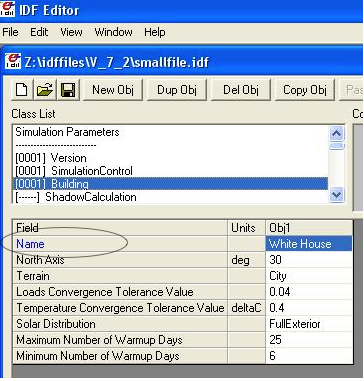

In [13]:
import ex_inits #no need to know this code, it just shows the image below
for_images = ex_inits
for_images.display_png(for_images.idfeditor) 


In the IDF Editor, the building object is selected.

We can see all the fields of the object "BUILDING".

They are:

- Name
- North Axis
- Terrain
- Loads Convergence Tolerance Value
- Temperature Convergence Tolerance Value
- Solar Distribution
- Maximum Number of Warmup Days
- Minimum Number of Warmup Days

Let us try to access the other fields.

In [14]:
print(building.Terrain)


City


How about the field "North Axis" ?

It is not a single word, but two words.

In a programming language, a variable has to be a single word without any spaces.

To solve this problem, put an underscore where there is a space.

So "North Axis" becomes "North_Axis".

In [15]:
print(building.North_Axis)


30.0


Now we can do:

In [16]:
print(building.Name)                                                                  
print(building.North_Axis)                                                            
print(building.Terrain)                                                               
print(building.Loads_Convergence_Tolerance_Value)                                     
print(building.Temperature_Convergence_Tolerance_Value)                               
print(building.Solar_Distribution)                                                    
print(building.Maximum_Number_of_Warmup_Days)                                         
print(building.Minimum_Number_of_Warmup_Days)                                         


Empire State Building
30.0
City
0.04
0.4
FullExterior
25
6


Where else can we find the field names?

The IDF Editor saves the idf file with the field name commented next to field.

Eppy also does this.

Let us take a look at the "BUILDING" object in the text file that the IDF Editor saves ::

This a good place to find the field names too.

It is easy to copy and paste from here. You can't do that from the IDF Editor.

We know that in an E+ model, there will be only ONE "BUILDING" object. This will be the first and only item in the list "buildings".

But E+ models are made up of objects such as "BUILDING", "SITE:LOCATION", "ZONE", "PEOPLE", "LIGHTS".   There can be a number of "ZONE" objects, a number of "PEOPLE" objects and a number of "LIGHTS" objects.

So how do you know if you're looking at the first "ZONE" object or the second one? Or the tenth one?  To answer this, we need to learn about how lists work in python.


## Python lesson 1: lists

Eppy holds these objects in a python structure called list. Let us take a look at how lists work in python. 

In [17]:
fruits = ["apple", "orange", "bannana"] 
# fruits is a list with three items in it.


To get the first item in fruits we say: 

In [18]:
fruits[0]  


'apple'

Why "0" ?

Because, unlike us, python starts counting from zero in a list. So, to get the third item in the list we'd need to input 2, like this:

In [19]:
print(fruits[2])


bannana


But calling the first fruit "fruit[0]" is rather cumbersome. Why don't we call it firstfruit?

In [20]:
firstfruit = fruits[0]
print(firstfruit)


apple


We also can say

In [21]:
goodfruit = fruits[0]
redfruit = fruits[0]

print(firstfruit)                                                                     
print(goodfruit)
print(redfruit)
print(fruits[0])

apple
apple
apple
apple


 As you see, we can call that item in the list whatever we want.  

#### How many items in the list

To know how many items are in a list, we ask for the length of the list.

The function 'len' will do this for us.

In [22]:
print(len(fruits))


3


There are 3 fruits in the list.

## Saving an idf file

This is easy:

In [23]:
idf1.save()


If you'd like to do a "Save as..." use this:

In [24]:
idf1.saveas('something.idf')


## Working with E+ objects

Let us open a small idf file that has only "CONSTRUCTION" and "MATERIAL" objects in it. You can open https://raw.githubusercontent.com/santoshphilip/eppy/0d99f8be881e7cf998208edb5e86c0654aaf5dc8/eppy/resources/idffiles/V_7_2/constructions.idf and take a look at the file. We are not printing it here because it is too long.  

So let us open it using the idfreader -

In [25]:
idf_url = 'https://raw.githubusercontent.com/santoshphilip/eppy/0d99f8be881e7cf998208edb5e86c0654aaf5dc8/eppy/resources/idffiles/V_7_2/constructions.idf'
from_url_to_file(idf_url, 'in2.idf')
idf1 = IDF('in2.idf')

Let us print all the "MATERIAL" objects in this model.

In [26]:
materials = idf1.idfobjects["MATERIAL"]
print(materials)


[
Material,
    F08 Metal surface,        !- Name
    Smooth,                   !- Roughness
    0.0008,                   !- Thickness
    45.28,                    !- Conductivity
    7824,                     !- Density
    500;                      !- Specific Heat
, 
Material,
    I01 25mm insulation board,    !- Name
    MediumRough,              !- Roughness
    0.0254,                   !- Thickness
    0.03,                     !- Conductivity
    43,                       !- Density
    1210;                     !- Specific Heat
, 
Material,
    I02 50mm insulation board,    !- Name
    MediumRough,              !- Roughness
    0.0508,                   !- Thickness
    0.03,                     !- Conductivity
    43,                       !- Density
    1210;                     !- Specific Heat
, 
Material,
    G01a 19mm gypsum board,    !- Name
    MediumSmooth,             !- Roughness
    0.019,                    !- Thickness
    0.16,                     !- Conductiv

As you can see, there are many material objects in this idf file.

The variable "materials" now contains a list of "MATERIAL" objects.

You already know a little about lists, so let us take a look at the items in this list.  

In [27]:
firstmaterial = materials[0]
secondmaterial = materials[1]


In [28]:
print(firstmaterial)



Material,
    F08 Metal surface,        !- Name
    Smooth,                   !- Roughness
    0.0008,                   !- Thickness
    45.28,                    !- Conductivity
    7824,                     !- Density
    500;                      !- Specific Heat



Let us print secondmaterial

In [29]:
print(secondmaterial)



Material,
    I01 25mm insulation board,    !- Name
    MediumRough,              !- Roughness
    0.0254,                   !- Thickness
    0.03,                     !- Conductivity
    43,                       !- Density
    1210;                     !- Specific Heat



This is awesome!! Why?

To understand what you can do with your objects organized as lists, you'll have to learn a little more about lists.

## Python lesson 2: more about lists

#### More ways to access items in a list

You should remember that you can access any item in a list by passing in its index.

The tricky part is that python starts counting at 0, so you need to input 0 in order to get the first item in a list.

Following the same logic, you need to input 3 in order to get the fourth item on the list. Like so:

In [30]:
bad_architects = ["Donald Trump", "Mick Jagger", 
        "Steve Jobs", "Lady Gaga", "Santa Clause"]
print(bad_architects[3])


Lady Gaga


But there's another way to access items in a list. If you input -1, it will return the last item. -2 will give you the second-to-last item, etc.

In [31]:
print(bad_architects[-1])
print(bad_architects[-2])


Santa Clause
Lady Gaga


#### Slicing a list

You can also get more than one item in a list:


In [32]:
print(bad_architects[1:3]) # slices at 1 and 3


['Mick Jagger', 'Steve Jobs']


How do I make sense of this?

To understand this you need to see the list in the following manner::

The slice operation bad_architects[1:3] slices right where the numbers are.

Does that make sense?

Let us try a few other slices:

In [33]:
print(bad_architects[2:-1]) # slices at 2 and -1
print(bad_architects[-3:-1]) # slices at -3 and -1


['Steve Jobs', 'Lady Gaga']
['Steve Jobs', 'Lady Gaga']


You can also slice in the following way:

In [34]:
print(bad_architects[3:] )
print(bad_architects[:2] )
print(bad_architects[-3:] )
print(bad_architects[:-2] )


['Lady Gaga', 'Santa Clause']
['Donald Trump', 'Mick Jagger']
['Steve Jobs', 'Lady Gaga', 'Santa Clause']
['Donald Trump', 'Mick Jagger', 'Steve Jobs']


I'll let you figure that out on your own.

#### Adding to a list

This is simple: the append function adds an item to the end of the list.

The following command will add 'something' to the end of the list called listname::

In [35]:
bad_architects.append("First-year students")
print(bad_architects)


['Donald Trump', 'Mick Jagger', 'Steve Jobs', 'Lady Gaga', 'Santa Clause', 'First-year students']


#### Deleting from a list

There are two ways to do this, based on the information you have.  If you have the value of the object, you'll want to use the remove function.  It looks like this:  


An example:

In [36]:
bad_architects.remove("First-year students")
print(bad_architects)


['Donald Trump', 'Mick Jagger', 'Steve Jobs', 'Lady Gaga', 'Santa Clause']


What if you know the index of the item you want to remove?

What if you appended an item by mistake and just want to remove the last item in the list?

You should use the pop function. It looks like this:

In [37]:
what_i_ate_today = ["coffee", "bacon", "eggs"]
print(what_i_ate_today)


['coffee', 'bacon', 'eggs']


In [38]:
what_i_ate_today.append("vegetables") # adds vegetables to the end of the list
# but I don't like vegetables
print(what_i_ate_today)


['coffee', 'bacon', 'eggs', 'vegetables']


In [39]:
# since I don't like vegetables
what_i_ate_today.pop(-1) # use index of -1, since vegetables is the last item in the list
print(what_i_ate_today)


['coffee', 'bacon', 'eggs']


You can also remove the second item.

In [40]:
what_i_ate_today.pop(1)


'bacon'

Notice the 'bacon' in the line above.

pop actually 'pops' the value (the one you just removed from the list) back to you.  

Let us pop the first item.

In [41]:
was_first_item = what_i_ate_today.pop(0)
print('was_first_item =', was_first_item)
print('what_i_ate_today = ', what_i_ate_today)

was_first_item = coffee
what_i_ate_today =  ['eggs']


what_i_ate_today is just 'eggs'?

That is not much of a breakfast!  

Let us get back to eppy.

## Continuing to work with E+ objects

Let us get those "MATERIAL" objects again

In [42]:
materials = idf1.idfobjects["MATERIAL"]


With our newfound knowledge of lists, we can do a lot of things.

Let us get the last material:

In [43]:
print(materials[-1])



Material,
    G05 25mm wood,            !- Name
    MediumSmooth,             !- Roughness
    0.0254,                   !- Thickness
    0.15,                     !- Conductivity
    608,                      !- Density
    1630;                     !- Specific Heat



How about the last two?

In [44]:
print(materials[-2:])


[
Material,
    M05 200mm concrete block,    !- Name
    MediumRough,              !- Roughness
    0.2032,                   !- Thickness
    1.11,                     !- Conductivity
    800,                      !- Density
    920;                      !- Specific Heat
, 
Material,
    G05 25mm wood,            !- Name
    MediumSmooth,             !- Roughness
    0.0254,                   !- Thickness
    0.15,                     !- Conductivity
    608,                      !- Density
    1630;                     !- Specific Heat
]


Pretty good.

#### Counting all the materials ( or counting all objects )

How many materials are in this model ?

In [45]:
print(len(materials))


10


#### Removing a material

Let us remove the last material in the list

In [46]:
was_last_material = materials.pop(-1)


In [47]:
print(len(materials))


9


Success! We have only 9 materials now.

The last material used to be:

'G05 25mm wood'

In [48]:
print(materials[-1])



Material,
    M05 200mm concrete block,    !- Name
    MediumRough,              !- Roughness
    0.2032,                   !- Thickness
    1.11,                     !- Conductivity
    800,                      !- Density
    920;                      !- Specific Heat



Now the last material in the list is:

'M15 200mm heavyweight concrete'

#### Adding a material to the list

We still have the old last material

In [49]:
print(was_last_material)



Material,
    G05 25mm wood,            !- Name
    MediumSmooth,             !- Roughness
    0.0254,                   !- Thickness
    0.15,                     !- Conductivity
    608,                      !- Density
    1630;                     !- Specific Heat



Let us add it back to the list

In [50]:
materials.append(was_last_material)


In [51]:
print(len(materials))


10


Once again we have 10 materials and the last material is:

In [52]:
print(materials[-1])



Material,
    G05 25mm wood,            !- Name
    MediumSmooth,             !- Roughness
    0.0254,                   !- Thickness
    0.15,                     !- Conductivity
    608,                      !- Density
    1630;                     !- Specific Heat



#### Add a new material to the model

So far we have been working only with materials that were already in the list.

What if we want to make new material?

Obviously we would use the function 'newidfobject'.

In [53]:
idf1.newidfobject("MATERIAL")



MATERIAL,
    ,                         !- Name
    ,                         !- Roughness
    ,                         !- Thickness
    ,                         !- Conductivity
    ,                         !- Density
    ,                         !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.7,                      !- Solar Absorptance
    0.7;                      !- Visible Absorptance

In [54]:
len(materials)


11

We have 11 items in the materials list.

Let us take a look at the last material in the list, where this fancy new material was added

In [55]:
print(materials[-1])



MATERIAL,
    ,                         !- Name
    ,                         !- Roughness
    ,                         !- Thickness
    ,                         !- Conductivity
    ,                         !- Density
    ,                         !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.7,                      !- Solar Absorptance
    0.7;                      !- Visible Absorptance



Looks a little different from the other materials. It does have the name we gave it. 

Why do some fields have values and others are blank ?  

"addobject" puts in all the default values, and leaves the others blank. It is up to us to put values in the the new fields. 

Let's do it now.  

In [56]:
materials[-1].Name = 'Peanut Butter'
materials[-1].Roughness = 'MediumSmooth'
materials[-1].Thickness = 0.03
materials[-1].Conductivity = 0.16
materials[-1].Density = 600
materials[-1].Specific_Heat = 1500


In [57]:
materials[-1]



MATERIAL,
    Peanut Butter,            !- Name
    MediumSmooth,             !- Roughness
    0.03,                     !- Thickness
    0.16,                     !- Conductivity
    600,                      !- Density
    1500,                     !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.7,                      !- Solar Absorptance
    0.7;                      !- Visible Absorptance

#### Copy an existing material

In [58]:
Peanutbuttermaterial = materials[-1]
idf1.copyidfobject(Peanutbuttermaterial)
materials = idf1.idfobjects["MATERIAL"]
len(materials)
materials[-1]



MATERIAL,
    Peanut Butter,            !- Name
    MediumSmooth,             !- Roughness
    0.03,                     !- Thickness
    0.16,                     !- Conductivity
    600,                      !- Density
    1500,                     !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.7,                      !- Solar Absorptance
    0.7;                      !- Visible Absorptance

## Python lesson 3: indentation and looping through lists

I'm tired of doing all this work, it's time to make python do some heavy lifting for us!  

Python can go through each item in a list and perform an operation on any (or every) item in the list.

This is called looping through the list.

Here's how to tell python to step through each item in a list, and then do something to every single item.

We'll use a 'for' loop to do this. ::

A quick note about the second line. Notice that it's indented? There are 4 blank spaces before the code starts::

It's elegant, but it means that the indentation of the code holds meaning.

So make sure to indent the second (and third and forth) lines of your loops!

Now let's make some fruit loops.  

In [59]:
fruits = ["apple", "orange", "bannana"] 


Given the syntax I gave you before I started rambling about indentation, we can easily print every item in the fruits list by using a 'for' loop.

In [60]:
for fruit in fruits:
   print(fruit)
    

apple
orange
bannana


That was easy! But it can get complicated pretty quickly... 

Let's make it do something more complicated than just print the fruits.  

Let's have python add some words to each fruit. 

In [61]:
for fruit in fruits:
    print("I am a fruit said the", fruit)
    

I am a fruit said the apple
I am a fruit said the orange
I am a fruit said the bannana


Now we'll try to confuse you:

In [62]:
rottenfruits = [] # makes a blank list called rottenfruits
for fruit in fruits: # steps through every item in fruits
    rottenfruit = "rotten " + fruit # changes each item to "rotten _____"
    rottenfruits.append(rottenfruit) # adds each changed item to the formerly empty list
    

In [63]:
print(rottenfruits)


['rotten apple', 'rotten orange', 'rotten bannana']


In [64]:
# here's a shorter way of writing it
rottenfruits = ["rotten " + fruit for fruit in fruits]


Did you follow all that??

Just in case you didn't, let's review that last one::

In [65]:
print(rottenfruits)


['rotten apple', 'rotten orange', 'rotten bannana']


#### Filtering in a loop

But what if you don't want to change *every* item in a list?

We can use an 'if' statement to operate on only some items in the list.  

Indentation is also important in 'if' statements, as you'll see::

In [66]:
fruits = ["apple", "orange", "pear", "berry", "mango", "plum", "peach", "melon", "bannana"]


In [67]:
for fruit in fruits:               # steps through every fruit in fruits
    if len(fruit) > 5:             # checks to see if the length of the word is more than 5
        print(fruit)                # if true, print the fruit
                                   # if false, python goes back to the 'for' loop 
                                      # and checks the next item in the list
                

orange
bannana


Let's say we want to pick only the fruits that start with the letter 'p'. 

In [68]:
p_fruits = []                      # creates an empty list called p_fruits
for fruit in fruits:               # steps through every fruit in fruits
    if fruit.startswith("p"):      # checks to see if the first letter is 'p', using a built-in function
        p_fruits.append(fruit)     # if the first letter is 'p', the item is added to p_fruits
                                   # if the first letter is not 'p', python goes back to the 'for' loop
                                      # and checks the next item in the list
                

In [69]:
print(p_fruits)


['pear', 'plum', 'peach']


In [70]:
# here's a shorter way to write it
p_fruits = [fruit for fruit in fruits if fruit.startswith("p")]


::

In [71]:
print(p_fruits)


['pear', 'plum', 'peach']


#### Counting through loops

This is not really needed, but it is nice to know. You can safely skip this.

Python's built-in function range() makes a list of numbers within a range that you specify.

This is useful because you can use these lists inside of loops.

In [72]:
range(4) # makes a list


range(0, 4)

In [73]:
for i in range(4):
    print(i)
    

0
1
2
3


In [74]:
len(p_fruits)


3

In [75]:
for i in range(len(p_fruits)):
    print(i)
    

0
1
2


In [76]:
for i in range(len(p_fruits)):
    print(p_fruits[i])
    

pear
plum
peach


In [77]:
for i in range(len(p_fruits)):
    print(i,  p_fruits[i])
    

0 pear
1 plum
2 peach


In [78]:
for item_from_enumerate in enumerate(p_fruits):
    print(item_from_enumerate)
    

(0, 'pear')
(1, 'plum')
(2, 'peach')


In [79]:
for i, fruit in enumerate(p_fruits):
    print(i, fruit)
    

0 pear
1 plum
2 peach


## Looping through E+ objects

If you have read the python explanation of loops, you are now masters of using loops.

Let us use the loops with E+ objects.

We'll continue to work with the materials list.

In [80]:
for material in materials:
    print(material.Name )
    

F08 Metal surface
I01 25mm insulation board
I02 50mm insulation board
G01a 19mm gypsum board
M11 100mm lightweight concrete
F16 Acoustic tile
M01 100mm brick
M15 200mm heavyweight concrete
M05 200mm concrete block
G05 25mm wood
Peanut Butter
Peanut Butter


In [81]:
[material.Name for material in materials] 


['F08 Metal surface',
 'I01 25mm insulation board',
 'I02 50mm insulation board',
 'G01a 19mm gypsum board',
 'M11 100mm lightweight concrete',
 'F16 Acoustic tile',
 'M01 100mm brick',
 'M15 200mm heavyweight concrete',
 'M05 200mm concrete block',
 'G05 25mm wood',
 'Peanut Butter',
 'Peanut Butter']

In [82]:
[material.Roughness for material in materials]


['Smooth',
 'MediumRough',
 'MediumRough',
 'MediumSmooth',
 'MediumRough',
 'MediumSmooth',
 'MediumRough',
 'MediumRough',
 'MediumRough',
 'MediumSmooth',
 'MediumSmooth',
 'MediumSmooth']

In [83]:
[material.Thickness for material in materials]


[0.0008,
 0.0254,
 0.0508,
 0.019,
 0.1016,
 0.0191,
 0.1016,
 0.2032,
 0.2032,
 0.0254,
 0.03,
 0.03]

In [84]:
[material.Thickness for material in materials if material.Thickness > 0.1]


[0.1016, 0.1016, 0.2032, 0.2032]

In [85]:
[material.Name for material in materials if material.Thickness > 0.1]


['M11 100mm lightweight concrete',
 'M01 100mm brick',
 'M15 200mm heavyweight concrete',
 'M05 200mm concrete block']

In [86]:
thick_materials = [material for material in materials if material.Thickness > 0.1]


In [87]:
thick_materials


[
 Material,
     M11 100mm lightweight concrete,    !- Name
     MediumRough,              !- Roughness
     0.1016,                   !- Thickness
     0.53,                     !- Conductivity
     1280,                     !- Density
     840;                      !- Specific Heat,
 
 Material,
     M01 100mm brick,          !- Name
     MediumRough,              !- Roughness
     0.1016,                   !- Thickness
     0.89,                     !- Conductivity
     1920,                     !- Density
     790;                      !- Specific Heat,
 
 Material,
     M15 200mm heavyweight concrete,    !- Name
     MediumRough,              !- Roughness
     0.2032,                   !- Thickness
     1.95,                     !- Conductivity
     2240,                     !- Density
     900;                      !- Specific Heat,
 
 Material,
     M05 200mm concrete block,    !- Name
     MediumRough,              !- Roughness
     0.2032,                   !- Thickness
     

In [88]:
# change the names of the thick materials
for material in thick_materials:
    material.Name = "THICK " + material.Name
    

In [89]:
thick_materials


[
 Material,
     THICK M11 100mm lightweight concrete,    !- Name
     MediumRough,              !- Roughness
     0.1016,                   !- Thickness
     0.53,                     !- Conductivity
     1280,                     !- Density
     840;                      !- Specific Heat,
 
 Material,
     THICK M01 100mm brick,    !- Name
     MediumRough,              !- Roughness
     0.1016,                   !- Thickness
     0.89,                     !- Conductivity
     1920,                     !- Density
     790;                      !- Specific Heat,
 
 Material,
     THICK M15 200mm heavyweight concrete,    !- Name
     MediumRough,              !- Roughness
     0.2032,                   !- Thickness
     1.95,                     !- Conductivity
     2240,                     !- Density
     900;                      !- Specific Heat,
 
 Material,
     THICK M05 200mm concrete block,    !- Name
     MediumRough,              !- Roughness
     0.2032,                   

So now we're working with two different lists: materials and thick_materials.

But even though the items can be separated into two lists, we're still working with the same items.

Here's a helpful illustration:

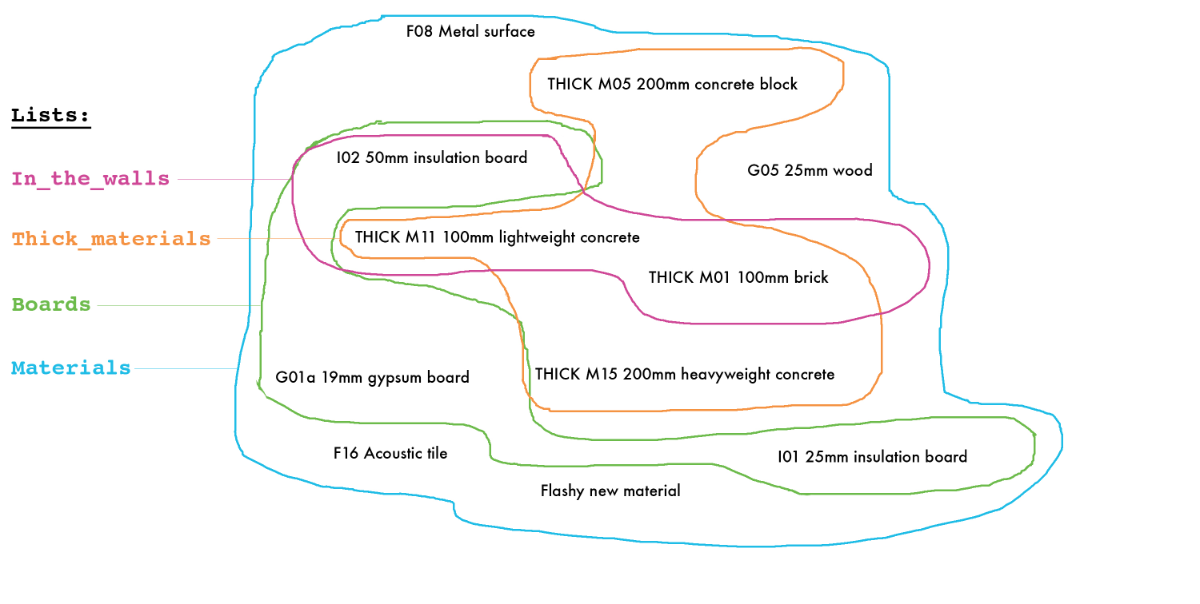

In [90]:
for_images.display_png(for_images.material_lists) # display the image below

In [91]:
# here's the same concept, demonstrated with code
# remember, we changed the names of the items in the list thick_materials
# these changes are visible when we print the materials list; the thick materials are also in the materials list
[material.Name for material in materials]


['F08 Metal surface',
 'I01 25mm insulation board',
 'I02 50mm insulation board',
 'G01a 19mm gypsum board',
 'THICK M11 100mm lightweight concrete',
 'F16 Acoustic tile',
 'THICK M01 100mm brick',
 'THICK M15 200mm heavyweight concrete',
 'THICK M05 200mm concrete block',
 'G05 25mm wood',
 'Peanut Butter',
 'Peanut Butter']

## Geometry functions in eppy

Sometimes, we want information about the E+ object that is not in the fields. For example, it would be useful to know the areas and orientations of the surfaces. These attributes of the surfaces are not in the fields of surfaces, but surface objects *do* have fields that have the coordinates of the surface. The areas and orientations can be calculated from these coordinates.  

Pyeplus has some functions that will do the calculations.  

In the present version, pyeplus will calculate:

- surface azimuth
- surface tilt
- surface area

Let us explore these functions

In [92]:
idf_url = 'https://raw.githubusercontent.com/santoshphilip/eppy/master/eppy/resources/idffiles/V_7_0/5ZoneSupRetPlenRAB.idf'
from_url_to_file(idf_url, 'in3.idf')
idf1 = IDF('in3.idf')
surfaces = idf1.idfobjects['BUILDINGSURFACE:DETAILED']


In [93]:
# Let us look at the first surface
asurface = surfaces[0]
print("surface azimuth =",  asurface.azimuth, "degrees")
print("surface tilt =", asurface.tilt, "degrees")
print("surface area =", asurface.area, "m2")


surface azimuth = 180.0 degrees
surface tilt = 90.0 degrees
surface area = 18.299999999999997 m2


In [94]:
# all the surface names
s_names = [surface.Name for surface in surfaces]
print(s_names[:5]) # print five of them


['WALL-1PF', 'WALL-1PR', 'WALL-1PB', 'WALL-1PL', 'TOP-1']


In [95]:
# surface names and azimuths
s_names_azm = [(sf.Name, sf.azimuth) for sf in surfaces]
print(s_names_azm[:5]) # print five of them


[('WALL-1PF', 180.0), ('WALL-1PR', 90.0), ('WALL-1PB', 0.0), ('WALL-1PL', 270.0), ('TOP-1', 0.0)]


In [96]:
# or to do that in pretty printing
for name, azimuth in s_names_azm[:5]: # just five of them
    print(name, azimuth)
    

WALL-1PF 180.0
WALL-1PR 90.0
WALL-1PB 0.0
WALL-1PL 270.0
TOP-1 0.0


In [97]:
# surface names and tilt
s_names_tilt = [(sf.Name, sf.tilt) for sf in surfaces]
for name, tilt in s_names_tilt[:5]: # just five of them
    print(name, tilt)
    

WALL-1PF 90.0
WALL-1PR 90.0
WALL-1PB 90.0
WALL-1PL 90.0
TOP-1 0.0


In [98]:
# surface names and areas
s_names_area = [(sf.Name, sf.area) for sf in surfaces]
for name, area in s_names_area[:5]: # just five of them
    print(name, area, "m2")
    

WALL-1PF 18.299999999999997 m2
WALL-1PR 9.119999999999997 m2
WALL-1PB 18.299999999999997 m2
WALL-1PL 9.119999999999997 m2
TOP-1 463.59999999999997 m2


Let us try to isolate the exterior north facing walls and change their construnctions

In [99]:
# just vertical walls
vertical_walls = [sf for sf in surfaces if sf.tilt == 90.0]
print([sf.Name for sf in vertical_walls])


['WALL-1PF', 'WALL-1PR', 'WALL-1PB', 'WALL-1PL', 'FRONT-1', 'SB12', 'SB14', 'SB15', 'RIGHT-1', 'SB21', 'SB23', 'SB25', 'BACK-1', 'SB32', 'SB34', 'SB35', 'LEFT-1', 'SB41', 'SB43', 'SB45', 'SB51', 'SB52', 'SB53', 'SB54', 'WALL-1SF', 'WALL-1SR', 'WALL-1SB', 'WALL-1SL']


In [100]:
# north facing walls
north_walls = [sf for sf in vertical_walls if sf.azimuth == 0.0]
print([sf.Name for sf in north_walls])


['WALL-1PB', 'SB15', 'BACK-1', 'SB53', 'WALL-1SB']


In [101]:
# north facing exterior walls
exterior_nwall = [sf for sf in north_walls if sf.Outside_Boundary_Condition == "Outdoors"]
print([sf.Name for sf in exterior_nwall])


['WALL-1PB', 'BACK-1', 'WALL-1SB']


In [102]:
# print out some more details of the north wall
north_wall_info = [(sf.Name, sf.azimuth, sf.Construction_Name) for sf in exterior_nwall]
for name, azimuth, construction in north_wall_info:
    print(name, azimuth, construction)
    

WALL-1PB 0.0 WALL-1
BACK-1 0.0 WALL-1
WALL-1SB 0.0 WALL-1


In [103]:
# change the construction in the exterior north walls
for wall in exterior_nwall:
    wall.Construction_Name = "NORTHERN-WALL" # make sure such a construction exists in the model
    

In [104]:
# see the change
north_wall_info = [(sf.Name, sf.azimuth, sf.Construction_Name) for sf in exterior_nwall]
for name, azimuth, construction in north_wall_info:
    print(name, azimuth, construction)
    

WALL-1PB 0.0 NORTHERN-WALL
BACK-1 0.0 NORTHERN-WALL
WALL-1SB 0.0 NORTHERN-WALL


In [105]:
# see this in all surfaces
for sf in surfaces:
    print(sf.Name, sf.azimuth, sf.Construction_Name)
    

WALL-1PF 180.0 WALL-1
WALL-1PR 90.0 WALL-1
WALL-1PB 0.0 NORTHERN-WALL
WALL-1PL 270.0 WALL-1
TOP-1 0.0 ROOF-1
C1-1P 0.0 CLNG-1
C2-1P 0.0 CLNG-1
C3-1P 0.0 CLNG-1
C4-1P 0.0 CLNG-1
C5-1P 0.0 CLNG-1
FRONT-1 180.0 WALL-1
C1-1 0.0 CLNG-1
F1-1 0.0 CLNG-1
SB12 44.99999999999992 INT-WALL-1
SB14 315.0 INT-WALL-1
SB15 0.0 INT-WALL-1
RIGHT-1 90.0 WALL-1
C2-1 0.0 CLNG-1
F2-1 0.0 CLNG-1
SB21 225.0 INT-WALL-1
SB23 315.784824602992 INT-WALL-1
SB25 270.0 INT-WALL-1
BACK-1 0.0 NORTHERN-WALL
C3-1 0.0 CLNG-1
F3-1 0.0 CLNG-1
SB32 135.78482460299188 INT-WALL-1
SB34 224.21517539700812 INT-WALL-1
SB35 180.0 INT-WALL-1
LEFT-1 270.0 WALL-1
C4-1 0.0 CLNG-1
F4-1 0.0 CLNG-1
SB41 135.0 INT-WALL-1
SB43 44.21517539700808 INT-WALL-1
SB45 90.0 INT-WALL-1
C5-1 0.0 CLNG-1
F5-1 0.0 CLNG-1
SB51 180.0 INT-WALL-1
SB52 90.0 INT-WALL-1
SB53 0.0 INT-WALL-1
SB54 270.0 INT-WALL-1
WALL-1SF 180.0 WALL-1
WALL-1SR 90.0 WALL-1
WALL-1SB 0.0 NORTHERN-WALL
WALL-1SL 270.0 WALL-1
BOTTOM-1 0.0 FLOOR-SLAB-1
F1-1S 0.0 CLNG-1
F2-1S 0.0 CLNG-1
F

You can see the "NORTHERN-WALL" in the print out above.

This shows that very sophisticated modification can be made to the model rather quickly. 